In [2]:
import pandas as pd
import numpy as np
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from sklearn import svm

# Spam Classifier

### Import dataset

In [3]:
data = pd.read_csv('SMSSpamCollection.csv', delimiter='\t', names=['type', 'body'])
data = data.sort_values('type').reset_index(drop=True)
data.groupby('type').size()

type
ham     4825
spam     747
dtype: int64

### Support Vector Machines (SVM)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(data.body, data.type, test_size=0.3, random_state=109)

In [5]:
text_clf_svm = Pipeline([('vect', CountVectorizer()),
                        ('tfidf', TfidfTransformer()),
                        ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',
                            alpha=1e-3, max_iter=5, random_state=42)),])

In [6]:
text_clf_svm.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip...ty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False))])

In [7]:
y_pred = text_clf_svm.predict(X_test)

In [10]:
print(classification_report(y_test, y_pred))
print("Accuracy:",accuracy_score(y_test, y_pred))

             precision    recall  f1-score   support

        ham       0.97      1.00      0.99      1452
       spam       0.99      0.82      0.90       220

avg / total       0.98      0.98      0.97      1672

Accuracy: 0.9754784688995215


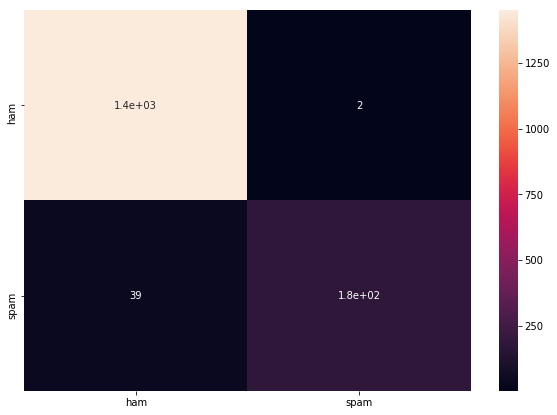

In [9]:
matrix = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(matrix, index = ['ham', 'spam'],
                  columns = ['ham', 'spam'])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True)